### call utility functions to get the analysis file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sys
script_directory = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/Math485/packages'
sys.path.append(script_directory)
import dhs_util
from dhs_util import *

os.chdir('/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/data')
df = pd.read_csv('dhs_service_records_synthesized_final.csv')
df = dhs_preprocessing(df)
df, service_map = add_service_label(df)
df = add_age_bin(df)

recipient = get_recipient_attribute(df)

/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/Math485/packages/dhs_util.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recipient = df.groupby(df['id'].cat.remove_unused_categories()).agg(


* we can get the code documentation 

In [3]:
print(dhs_util.__doc__) # this refreshes at kernel refresh level, i.e., new change in doc string will only be reflected after a restart of the kernel


None


In [4]:
print(dhs_preprocessing.__doc__) 

 Data cleaning rules we follow in this work
        drop the columns that contain NA entirely
        drop the columns that has only one value in its entirety as they have not information. 
        
        because we do not know enough details about how the reocrd data are created/collected
        we will not remove records with age greater than a value, 
        nor will we remove records with seemingly conflict between age and education level
    


In [5]:
df.shape, recipient.shape

((7116134, 12), (533799, 15))

In [6]:
recipient.head()

,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,serv,age_bin
0,1,12,1,2021-01-31,2021-12-31,12,12,13,1~Male,99~Unknown,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,S12,10-19
12,2,1,1,2021-02-28,2021-02-28,1,1,70,2~Female,1~White,2~Not Hispanic/Latinx,2~Married,99~Unknown,S12,70-79
13,3,11,1,2021-02-28,2021-12-31,11,11,29,2~Female,1~White,2~Not Hispanic/Latinx,2~Married,9-12~High School (grade 9-12),S12,20-29
24,4,4,1,2021-03-31,2021-12-31,4,4,4,2~Female,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S12,0-9
28,5,12,1,2021-01-31,2021-12-31,12,12,40,1~Male,2~Black/African American,2~Not Hispanic/Latinx,2~Married,UNDERGRAD~Some College,S12,40-49


In [7]:
service_map

{'Children_Attending_Early_Childhood_Programs_Managed_by_DHS': 'S01',
 'Children_in_Care': 'S02',
 'Children_Receiving_Child_Welfare_Services': 'S03',
 'Children_Receiving_DHS_Funded_Out_of_School_Programs': 'S04',
 'Children_Receiving_Early_Intervention_Services': 'S05',
 'Families_Receiving_Child_Welfare_Services': 'S06',
 'Homeless_Population': 'S07',
 'Homicides': 'S08',
 'Individuals_Receiving_DHS_Services': 'S09',
 'Individuals_Receiving_Family_Strengthening_Programs': 'S10',
 'Individuals_Receiving_Homelessness_and_Housing_Services': 'S11',
 'Individuals_Receiving_Income_Supports': 'S12',
 'Individuals_Receiving_Intellectual_Disability_Services': 'S13',
 'Individuals_Receiving_Mental_Health_Services': 'S14',
 'Individuals_Receiving_Substance_Use_Disorder_Services': 'S15',
 'Involuntary_Commitments': 'S16',
 'Jail_Population': 'S17',
 'Mental_Health_Crises': 'S18',
 'Older_Adults_Receiving_Services': 'S19',
 'Overdoses': 'S20',
 'Parents_Receiving_Child_Welfare_Services': 'S21',


In [8]:
def get_service_attribute(df):
    service = df.groupby(['serv']).agg(
        num_recipient = ('id', 'count'),
        distinct_recipient = ('id', 'nunique'), 
        num_month = ('month', 'count'), 
        distinct_month = ('month', 'nunique')
    ).reset_index()
    return service

In [9]:
service = get_service_attribute(df)

/var/folders/99/6591xgpn4sq1ypfgnrzy_7n80000gn/T/ipykernel_65328/4072256100.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  service = df.groupby(['serv']).agg(


In [10]:
service

,serv,num_recipient,distinct_recipient,num_month,distinct_month
0,S01,2302,349,2302,12
1,S03,50373,7306,50373,12
2,S04,4606,1198,4606,12
3,S05,45923,6752,45923,12
4,S02,18442,2237,18442,12
5,S06,23473,3118,23473,12
6,S07,13950,3415,13950,12
7,S08,172,172,172,12
8,S09,626722,82122,626722,12
9,S10,28110,2986,28110,12


In [11]:
service.num_recipient/service.distinct_month

0        191.833333
1       4197.750000
2        383.833333
3       3826.916667
4       1536.833333
5       1956.083333
6       1162.500000
7         14.333333
8      52226.833333
9       2342.500000
10     12414.000000
11    454249.416667
12      6178.750000
13     27020.083333
14      6228.083333
15       588.416667
16      2248.916667
17       603.750000
18     10929.416667
19       109.916667
20      4502.916667
21        98.083333
dtype: float64

### Retention cohorts 
* group recipients by their first usage of any services, the first month of receiving services
* this grouping would create a set of cohorts, each cohort correspond to the month where all member of the cohort started using the services for the first time (in this dataset)
* This would be assuming January is the beginning of history
* we already have the first month in the dataframe recipient
* we want to attach this first month back to the overall service usage table (the full transaction dataset) so that we can compute the elapsed time of each usage of the service to the first months 
* then aggregate over the first month (the cohort) and the elaped months, this will yield number of recipients who are still receiving services at the nth month (the elapsed month)

* we will use merge, and we will only need the date columns

In [12]:
df_retention = pd.merge(df, recipient[['id','first_date']], on = 'id', how = 'left')
df_retention['elapsed'] = df_retention['date'].dt.month - df_retention['first_date'].dt.month
df_retention.head(30)

,id,date,service,age,gender,race,ethnicity,marital,education,month,serv,age_bin,first_date,elapsed
0,1626,2021-01-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),January,S01,0-9,2021-01-31,0
1,1626,2021-02-28,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),February,S01,0-9,2021-01-31,1
2,1626,2021-03-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),March,S01,0-9,2021-01-31,2
3,1626,2021-04-30,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),April,S01,0-9,2021-01-31,3
4,1626,2021-05-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),May,S01,0-9,2021-01-31,4
5,1626,2021-06-30,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),June,S01,0-9,2021-01-31,5
6,3775,2021-01-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,99~Unknown,99~Unknown,99~Unknown,99~Unknown,January,S01,0-9,2021-01-31,0
7,3775,2021-02-28,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,99~Unknown,99~Unknown,99~Unknown,99~Unknown,February,S01,0-9,2021-01-31,1
8,3775,2021-03-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,99~Unknown,99~Unknown,99~Unknown,99~Unknown,March,S01,0-9,2021-01-31,2
9,3775,2021-04-30,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,99~Unknown,99~Unknown,99~Unknown,99~Unknown,April,S01,0-9,2021-01-31,3


In [13]:
df_retention_count = df_retention.groupby(["first_date", "elapsed"]).agg(
    active = ("id", "nunique"),
    ).reset_index()
df_retention_count = df_retention_count.pivot(index = "first_date", columns="elapsed", values='active')


In [14]:
df_retention_count

elapsed,0,1,2,3,4,5,6,7,8,9,10,11
first_date,,,,,,,,,,,,
2021-01-31,457593.0,436881.0,438529.0,439693.0,437510.0,438422.0,439177.0,439569.0,441966.0,441414.0,440636.0,437669.0
2021-02-28,24326.0,13095.0,13818.0,13204.0,13740.0,14392.0,14829.0,16244.0,16872.0,17155.0,16207.0,NaN
2021-03-31,14139.0,7761.0,7485.0,8039.0,8426.0,8719.0,9703.0,10537.0,11006.0,10479.0,NaN,NaN
2021-04-30,7818.0,4204.0,4516.0,4815.0,5048.0,5699.0,6169.0,6377.0,6211.0,NaN,NaN,NaN
2021-05-31,4679.0,2627.0,2856.0,3091.0,3444.0,3648.0,3826.0,3734.0,NaN,NaN,NaN,NaN
2021-06-30,3086.0,1821.0,2003.0,2089.0,2240.0,2342.0,2263.0,NaN,NaN,NaN,NaN,NaN
2021-07-31,2400.0,1435.0,1501.0,1578.0,1668.0,1571.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-31,2829.0,1856.0,1968.0,2095.0,1995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-30,1626.0,854.0,1016.0,920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* how can we verify this?

In [15]:
recipient.groupby("first_date").id.nunique()

first_date
2021-01-31    457593
2021-02-28     24326
2021-03-31     14139
2021-04-30      7818
2021-05-31      4679
2021-06-30      3086
2021-07-31      2400
2021-08-31      2829
2021-09-30      1626
2021-10-31      4028
2021-11-30      5036
2021-12-31      6239
Name: id, dtype: int64

### getting retention rate

In [16]:
df_retention_ratio = df_retention_count.reset_index()
df_retention_ratio = df_retention_count.div(df_retention_ratio.iloc[:,1].to_numpy(),axis = 0)
df_retention_ratio

elapsed,0,1,2,3,4,5,6,7,8,9,10,11
first_date,,,,,,,,,,,,
2021-01-31,1.0,0.954737,0.958339,0.960882,0.956112,0.958105,0.959755,0.960611,0.965850,0.964643,0.962943,0.956459
2021-02-28,1.0,0.538313,0.568034,0.542794,0.564828,0.591630,0.609595,0.667763,0.693579,0.705213,0.666242,NaN
2021-03-31,1.0,0.548907,0.529387,0.568569,0.595940,0.616663,0.686258,0.745244,0.778414,0.741142,NaN,NaN
2021-04-30,1.0,0.537733,0.577641,0.615886,0.645689,0.728959,0.789076,0.815682,0.794449,NaN,NaN,NaN
2021-05-31,1.0,0.561445,0.610387,0.660611,0.736055,0.779654,0.817696,0.798034,NaN,NaN,NaN,NaN
2021-06-30,1.0,0.590084,0.649060,0.676928,0.725859,0.758911,0.733312,NaN,NaN,NaN,NaN,NaN
2021-07-31,1.0,0.597917,0.625417,0.657500,0.695000,0.654583,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-31,1.0,0.656062,0.695652,0.740544,0.705196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-30,1.0,0.525215,0.624846,0.565806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* plot in heatmap

<Axes: xlabel='elapsed', ylabel='first_date'>

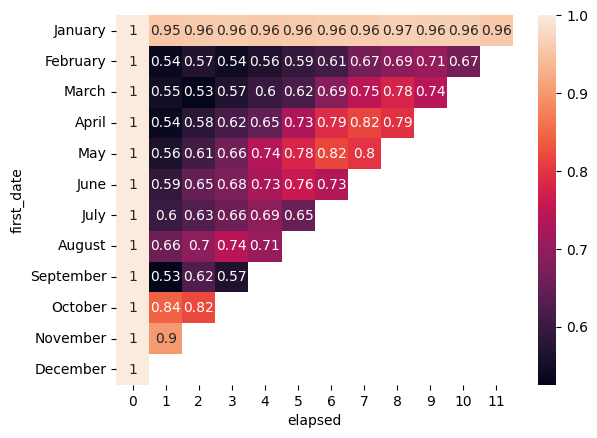

In [17]:
sns.heatmap(df_retention_ratio, annot=True,yticklabels=pd.to_datetime(df_retention_ratio.index.values).month_name())


### to compute correlation between usage of services 
* need to create a new dataframe that has row for each recipient and columns for individual services and the value being the times/months the recipent used the services
* we first make teh service usage into a "long table", each row is "id", "service", "number of times used"
* we then can pivot the service column into individual services as columns, each row is for each recipient, and columns as service 1, service 2, service 3 ...
* correlation can then becomputed over the pairwise columns 

In [18]:
df.head()

,id,date,service,age,gender,race,ethnicity,marital,education,month,serv,age_bin
0,1626,2021-01-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),January,S01,0-9
1,1626,2021-02-28,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),February,S01,0-9
2,1626,2021-03-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),March,S01,0-9
3,1626,2021-04-30,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),April,S01,0-9
4,1626,2021-05-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),May,S01,0-9


In [19]:
df_temp = df.groupby(["id","serv"]).agg(
    num_serv = ('service', 'nunique') # this will be 1 or 0, "service" is categorical 
).reset_index()

/var/folders/99/6591xgpn4sq1ypfgnrzy_7n80000gn/T/ipykernel_65328/782567563.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp = df.groupby(["id","serv"]).agg(


In [20]:
df_temp.head(30)

,id,serv,num_serv
0,1,S01,0
1,1,S03,0
2,1,S04,0
3,1,S05,0
4,1,S02,0
5,1,S06,0
6,1,S07,0
7,1,S08,0
8,1,S09,0
9,1,S10,0


In [21]:
df_serv = df_temp.pivot_table(
    values='num_serv', 
    index=["id"], columns="serv", aggfunc=np.sum
    ).reset_index()

/var/folders/99/6591xgpn4sq1ypfgnrzy_7n80000gn/T/ipykernel_65328/101865298.py:1: FutureWarning: The provided callable <function sum at 0x10b14d620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_serv = df_temp.pivot_table(


In [22]:
df_serv[['S09','S12','S14','S19']].describe()

serv,S09,S12,S14,S19
count,533799.000000,533799.000000,533799.000000,533799.000000
mean,0.153844,0.941422,0.103528,0.031396
std,0.360800,0.234834,0.304647,0.174385
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [23]:
df_serv.head(30)

serv,id,S01,S03,S04,S05,S02,S06,S07,S08,S09,...,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_serv.iloc[:,1:22].sum()

serv
S01       349
S03      7306
S04      1198
S05      6752
S02      2237
S06      3118
S07      3415
S08       172
S09     82122
S10      2986
S11     21823
S12    502530
S13      6360
S14     55263
S15     12812
S16      5010
S17      6922
S18      7245
S19     16759
S20      1319
S21      7078
dtype: int64

In [25]:
df_serv.iloc[:,1:23].corr(method="spearman")

serv,S01,S03,S04,S05,S02,S06,S07,S08,S09,S10,...,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22
serv,,,,,,,,,,,,,,,,,,,,,
S01,1.000000,0.030419,0.032860,0.004319,0.018762,-0.001961,-0.000214,-0.000459,-0.007859,0.033457,...,-0.001458,-0.006286,-0.004011,-0.001730,-0.002932,-0.003000,-0.004605,-0.001273,-0.002965,-0.001202
S03,0.030419,1.000000,0.072781,0.081313,0.544207,-0.005433,0.021894,-0.001217,0.075569,0.111580,...,0.004897,0.066561,-0.014575,-0.002604,-0.012220,0.021019,-0.021208,-0.004889,-0.009568,-0.004850
S04,0.032860,0.072781,1.000000,-0.001826,0.044724,-0.002077,0.003146,0.003560,0.011817,0.020329,...,-0.001924,0.006364,-0.006144,-0.002564,-0.005436,-0.001800,-0.008539,-0.000766,-0.004460,-0.001385
S05,0.004319,0.081313,-0.001826,1.000000,0.106316,-0.007576,0.002482,-0.001098,-0.003613,0.013987,...,-0.005013,0.002695,-0.017750,-0.006845,-0.012973,-0.002411,-0.020378,-0.004283,-0.013121,-0.004606
S02,0.018762,0.544207,0.044724,0.106316,1.000000,-0.003450,0.014072,-0.001165,0.068950,0.067067,...,-0.000175,0.073240,-0.008089,0.002708,-0.007436,0.023719,-0.011679,-0.003229,-0.005492,-0.003050
S06,-0.001961,-0.005433,-0.002077,-0.007576,-0.003450,1.000000,0.005566,0.015061,0.072723,0.025894,...,-0.002979,0.029147,0.067487,0.008856,0.016421,0.013742,-0.009289,0.018467,0.516809,-0.000983
S07,-0.000214,0.021894,0.003146,0.002482,0.014072,0.005566,1.000000,-0.001441,0.084637,0.010994,...,-0.004047,0.069682,0.055119,0.038246,0.036079,0.099230,-0.003398,0.000739,0.016170,-0.003772
S08,-0.000459,-0.001217,0.003560,-0.001098,-0.001165,0.015061,-0.001441,1.000000,-0.001580,0.000053,...,-0.001971,-0.002332,-0.000769,0.001500,0.003478,0.000600,-0.001437,0.009619,0.010694,-0.000844
S09,-0.007859,0.075569,0.011817,-0.003613,0.068950,0.072723,0.084637,-0.001580,1.000000,0.077110,...,0.168234,0.796974,0.284997,0.227900,0.116026,0.272582,0.006959,0.001891,0.143173,-0.018273


* double check S14 and S09
* double check S12 and S09

In [26]:
from scipy.stats import pearsonr   
pearsonr(df_serv.S12, df_serv.S09)[0], pearsonr(df_serv.S14, df_serv.S09)[0]

(-0.06729155634901972, 0.7969739943925933)

<Axes: xlabel='serv', ylabel='serv'>

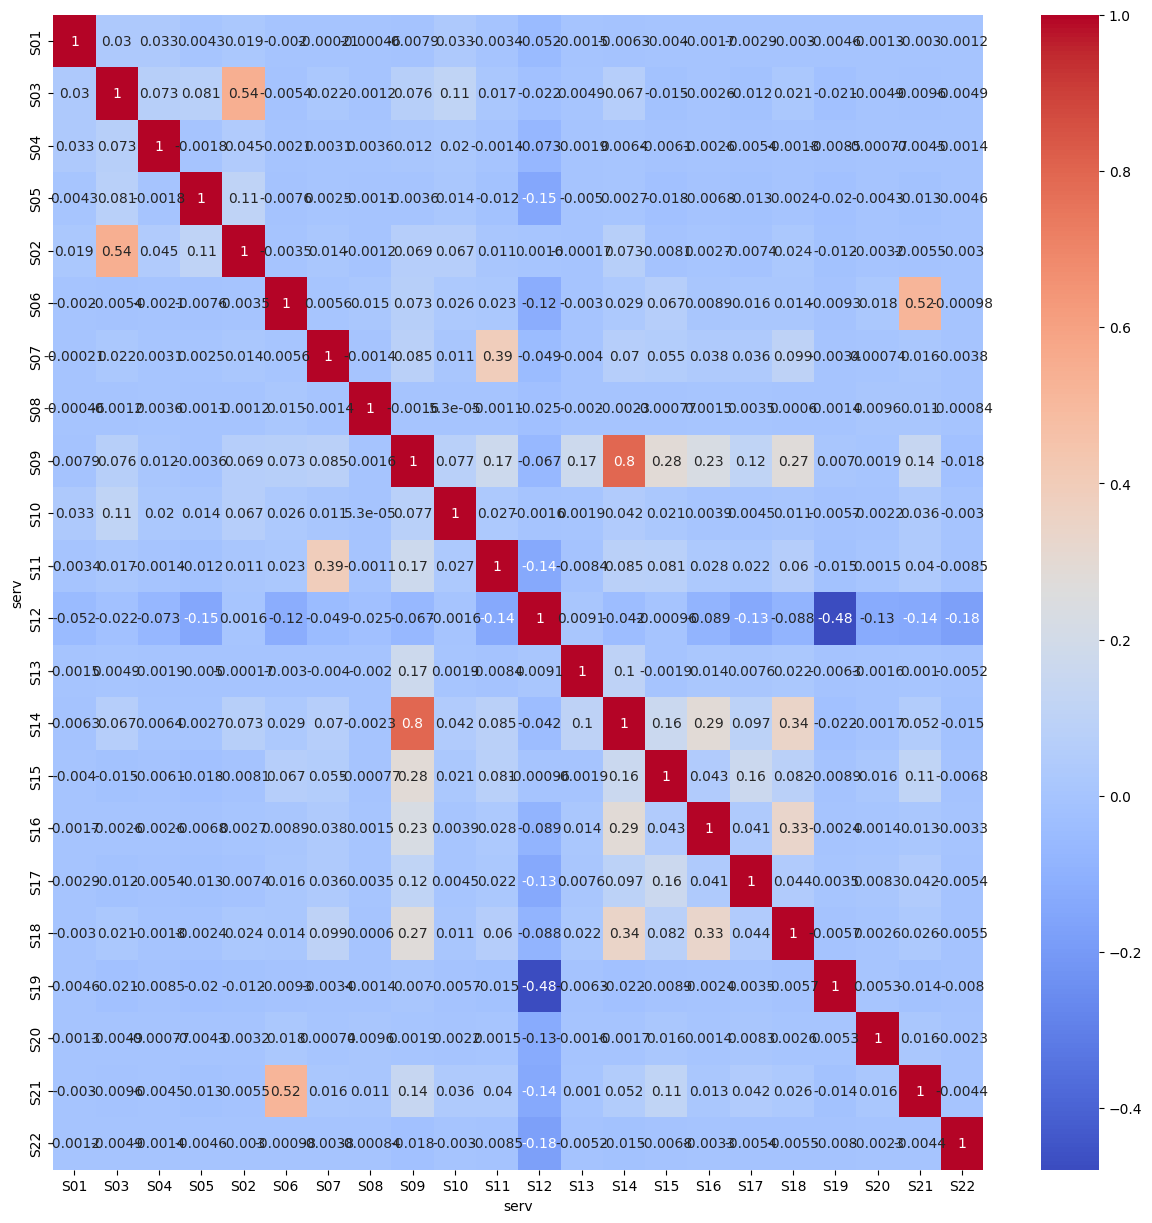

In [27]:
plt.figure(figsize=(15,15)) 
sns.heatmap(df_serv.iloc[:,1:23].corr(),annot=True, cmap='coolwarm')

<Axes: xlabel='serv', ylabel='serv'>

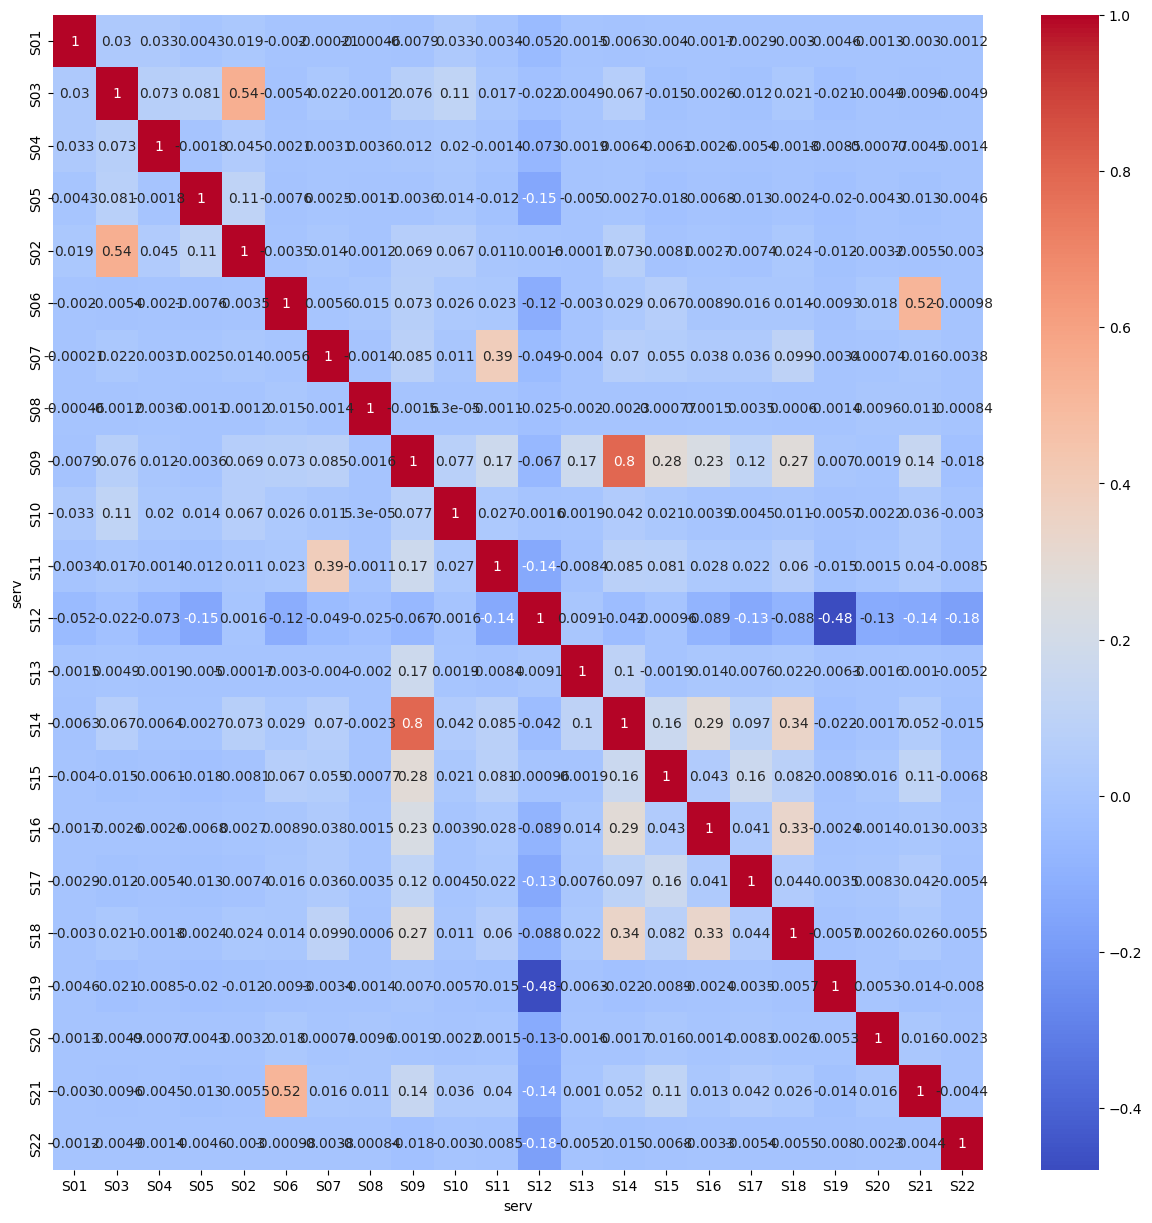

In [28]:
plt.figure(figsize=(15,15)) 
sns.heatmap(df_serv.iloc[:,1:23].corr(method="spearman"),annot=True, cmap='coolwarm')

### observations
* several "warm" spots indicating high positive correlations
* several "cold" spots indicating negative correlations, more concentrated in correlation with S12

* if we recall that there are many recipient who only uses S12, perhaps the picture may look different if we remove those recipients 


* use set operations
* recipients who used S12 only can be identified by the intersection between recipient who used S12 (ever) and those recipient who used only one service 
* we have S12_only and the rest as the total recipients subtract the S12 only recipients

In [29]:
s12_id =df.query("serv == 'S12'")['id'].unique()
one_serv_id = recipient.query("distinct_service == 1").id.to_list()
s12_only = list(set(s12_id) & set(one_serv_id))

* is this correct? how would we verify them?
* we don't have the number of recipient who does not do S12 
* the transaction data table will have groups of rows that makes up the set of services each recipient use, one row does not have S12 does not mean the recipent does not have S12


In [30]:
len(s12_id), len(one_serv_id),len(s12_only)

(502530, 424468, 401981)

* recipients who do not do "S12 only", may still do S12 along with other services

In [31]:
recipient.shape[0]-len(s12_only) # recipients who do not do "S12 only"

131818

In [32]:
df_serv[~df_serv.id.isin(s12_only)].shape # recipient not in S12_only list

(131818, 23)

* verifying through recipient who does S12 + recipient not doing S12_only is not correct
* verifying through recipient with distinct_service > 1 + receipients not doing S12 is not correct

In [33]:
df.id.nunique(), recipient.query("distinct_service > 1").id.nunique() + len(s12_only), 

(533799, 511312)

### redo correlation without the S12 only recipients

<Axes: xlabel='serv', ylabel='serv'>

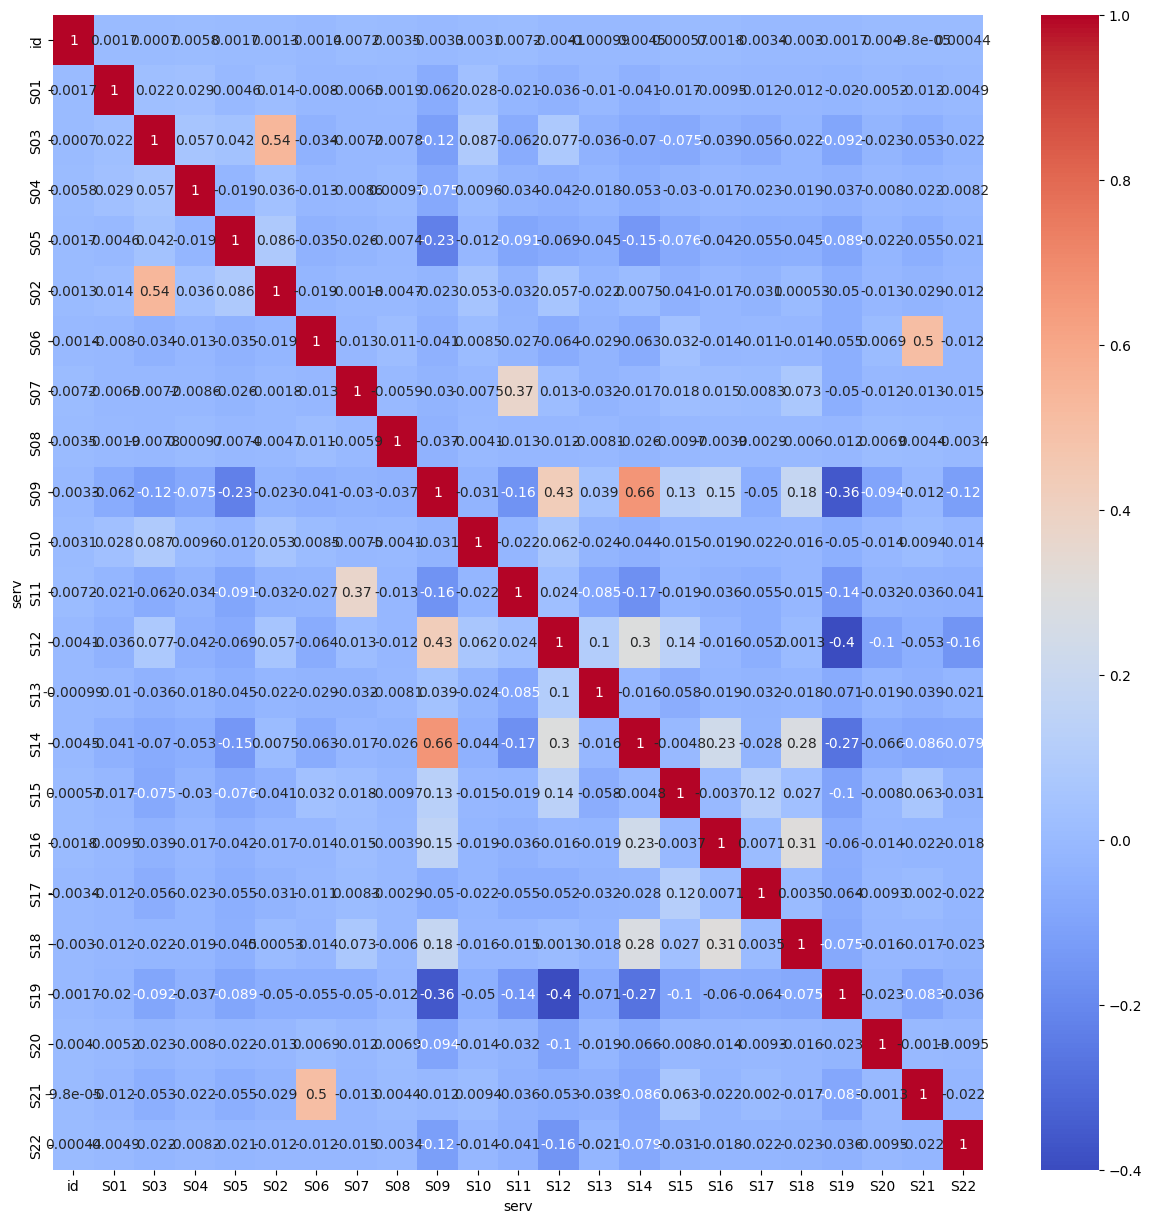

In [34]:
plt.figure(figsize=(15,15)) 
sns.heatmap(df_serv[~df_serv.id.isin(s12_only)].corr(),annot=True, cmap='coolwarm')

* we continue to see S12 has strong negative correlation with S19 (Older_Adults_Receiving_Services)
* S19 also has servel other strong negative correlations with several other services
* but we can see some positive correlations with other services

### defining behavior cohorts

* those recipients who are in some age range and received services in the earlier part of the year
* and, cohort 1 as those who have income service (S12) in addition to other services
* and, cohort 2 as those who have not received other services outside income service in this earlier part of the year
* we could overlay a filter on age, where we onyl study the age range that perhaps have potential to get off income service


In [35]:
cutoff_before = '2021-06-30'
cutoff_after = '2021-09-30'
age_lower = 24
age_upper = 55
df_before = df.query("date <= @cutoff_before")
df_after = df.query("date > @cutoff_after")

recipient_before = get_recipient_attribute(df_before)
id_s12_before =df_before.query("serv == 'S12'").id.unique()
id_one_serv_before = recipient_before.query("distinct_service == 1").id.unique()
id_s12_only_before = list(set(id_s12_before) & set(id_one_serv_before))
id_S12_and_other = set(id_s12_before).difference(set(id_s12_only_before))

/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/Math485/packages/dhs_util.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recipient = df.groupby(df['id'].cat.remove_unused_categories()).agg(


In [36]:
# if we want to apply the demographic filtering, e.g., age range, we could do below
# if we don't want to apply the demographic filtering, comment these out
id_cohort_age = df.query("age > @age_lower and age <= @age_upper").id.unique()
id_s12_before = list(set(id_s12_before) & set(id_cohort_age))
id_s12_only_before = list(set(id_s12_only_before) & set(id_cohort_age))
id_S12_and_other = list(set(id_S12_and_other) & set(id_cohort_age))

* at first, I was going to use the logic of below, but it was wrong!!! the users with more than one services may include those who did not use S12 at all, and hence the numbers will be inflated.

* first_more_than_one_serv_id = recipient_before.query("distinct_service > 1").id.unique()
* first_more_than_s12 = list(set(id_s12_before) & set(first_more_than_one_serv_id))
* id_S12_and_other = df_before[~df_before.id.isin(id_s12_only_before)].id.unique()


In [37]:
df_before.id.nunique(), len(id_s12_before), len(id_s12_only_before)+len(id_S12_and_other),recipient_before.shape[0]-len(id_s12_only_before) # recipients not doing S12 only

(511641, 187034, 187034, 364583)

In [38]:
recipient.query("first_date > '2021-06-30'").id.count()

22158

In [39]:
recipient.shape[0]-df_before.id.nunique()

22158

### generating cohort dataframe
* we need id, and a cohort label for the cohort that the id belongs to, "ch1" denotes the recipients who only used income service in the early part of the year, "ch2" denotes the cohort that used income service in conjunction with other services in the early part of the year

In [40]:
cohort1 = pd.DataFrame(zip(id_s12_only_before, ['ch1']*len(id_s12_only_before)),columns=['id','cohort'])
cohort2 = pd.DataFrame(zip(id_S12_and_other, ['ch2']*len(id_S12_and_other)),columns=['id','cohort'])
cohort_all=pd.concat([cohort1,cohort2],axis=0)

df_before = df_before.merge(cohort_all, on=['id'], how='inner')
df_after = df_after.merge(cohort_all, on=['id'], how='inner')


In [41]:
cohort_all.head()

,id,cohort
0,524288,ch1
1,262144,ch1
2,3,ch1
3,5,ch1
4,524295,ch1


In [42]:
cohort_all.groupby('cohort').id.nunique()

cohort
ch1    147058
ch2     39976
Name: id, dtype: int64

In [43]:
df_before.groupby('cohort').nunique()

,id,date,service,age,gender,race,ethnicity,marital,education,month,serv,age_bin
cohort,,,,,,,,,,,,
ch1,147058,6,1,31,3,7,3,7,8,6,1,4
ch2,39976,6,16,31,3,7,3,7,8,6,16,4


* everyone used S12 before the cutoff, because that was our selection criteria

In [44]:
df_before.query("serv == 'S12'").groupby(['cohort']).id.nunique()

cohort
ch1    147058
ch2     39976
Name: id, dtype: int64

* looking at S12 drop-offs after the cutoff date
* some people dropped off of the services entirely
* some people dropped off of S12

In [45]:
df_after.groupby('cohort').nunique()

,id,date,service,age,gender,race,ethnicity,marital,education,month,serv,age_bin
cohort,,,,,,,,,,,,
ch1,144488,3,16,31,3,7,3,7,8,3,16,4
ch2,39880,3,16,31,3,7,3,7,8,3,16,4


In [46]:
df_after.query("serv == 'S12'").groupby(['cohort']).nunique()

,id,date,service,age,gender,race,ethnicity,marital,education,month,serv,age_bin
cohort,,,,,,,,,,,,
ch1,144447,3,1,31,3,7,3,7,8,3,1,4
ch2,39559,3,1,31,3,7,3,7,8,3,1,4


* reduction of S12 recipients

In [47]:
(df_after.groupby('cohort').id.nunique() - df_after.query("serv == 'S12'").groupby(['cohort']).nunique('id')['id'])/df_after.groupby('cohort').id.nunique()


cohort
ch1    0.000284
ch2    0.008049
Name: id, dtype: float64

In [48]:
df_before.groupby(['cohort']).nunique()['id'], df_after.query("serv == 'S12'").groupby(['cohort']).nunique()['id']

(cohort
 ch1    147058
 ch2     39976
 Name: id, dtype: int64,
 cohort
 ch1    144447
 ch2     39559
 Name: id, dtype: int64)

* or percentage of remaining on S12

In [49]:
df_after.query("serv == 'S12'").groupby(['cohort']).nunique()['id']/df_before.groupby(['cohort']).nunique()['id']


cohort
ch1    0.982245
ch2    0.989569
Name: id, dtype: float64

In [50]:
df_after.query("serv == 'S12'").groupby(['cohort']).nunique('id')['id']/df_after.groupby('cohort').id.nunique()


cohort
ch1    0.999716
ch2    0.991951
Name: id, dtype: float64

In [51]:
recipient_after = get_recipient_attribute(df_after)
recipient_after.head()

AttributeError: Can only use .cat accessor with a 'category' dtype

In [ ]:
sns.displot(recipient_after, x="distinct_service", hue = "cohort", multiple="dodge")


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(recipient, title="Profiling Report")


In [ ]:
profile.to_widgets()


In [ ]:
profile.to_notebook_iframe()


### In class exercises
- build you own module of helper functions, store in file, and import into your main notebook for use
- Think about the behavior cohorts
    - can we conclude that income services combined with other services helps recipients reduce their reliance on income support overtime?
    - does the conclusion make sense? i.e., can the conclusions be reasonably explained by cross validation with other data view? 
- check out pandas.crosstab https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html#pandas.crosstab , see if you can prodce a table with service as row and race and gender as columns 
 